# Section 2.2 — Multiple random variable

This notebook contains all the code examples from [Section 2.2 Multiple random variables]() in the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np               # numerical calculations
import matplotlib.pyplot as plt  # generic plotting functions
import seaborn as sns            # plotting distributions

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)
%config InlineBackend.figure_format = 'retina'



DESTDIR = "figures/prob/multiple"  # where to save figures

from ministats.utils import savefigure

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Definitions

#### Example 1: two coin tosses

/Users/ivan/Projects/Minireference/software/ministats/ministats/utils.py:90: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


Saved figure to figures/prob/multiple/example1__joint_pmf_of_two_coin_tosses.pdf
Saved figure to figures/prob/multiple/example1__joint_pmf_of_two_coin_tosses.png


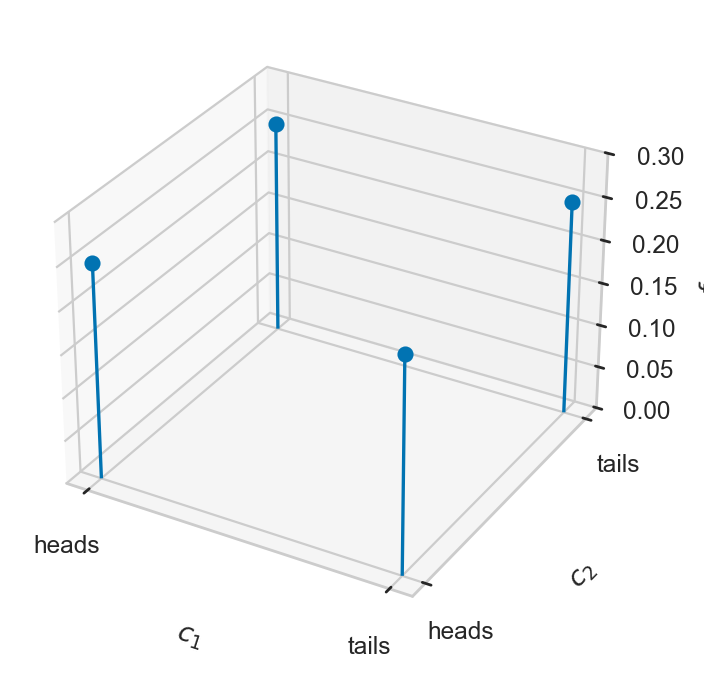

In [4]:
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

def fC1C2(c1,c2):
    return fC(c1)*fC(c2)

xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(0,1+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fC1C2(map_int_to_label[x], map_int_to_label[y])
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_yticks([0,1])
ax.set_yticklabels(["heads", "tails"])
ax.set_xlabel("$c_1$")
ax.set_ylabel("$c_2$")
ax.set_zlabel("$f_{C_1C_2}$")
ax.set_zlim([0, 0.3])

# save fig...
filename = os.path.join(DESTDIR, "example1__joint_pmf_of_two_coin_tosses.pdf")
savefigure(ax, filename)
# fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 2: rolling two dice

Saved figure to figures/prob/multiple/example2__joint_pmf_of_two_die_rolls.pdf
Saved figure to figures/prob/multiple/example2__joint_pmf_of_two_die_rolls.png


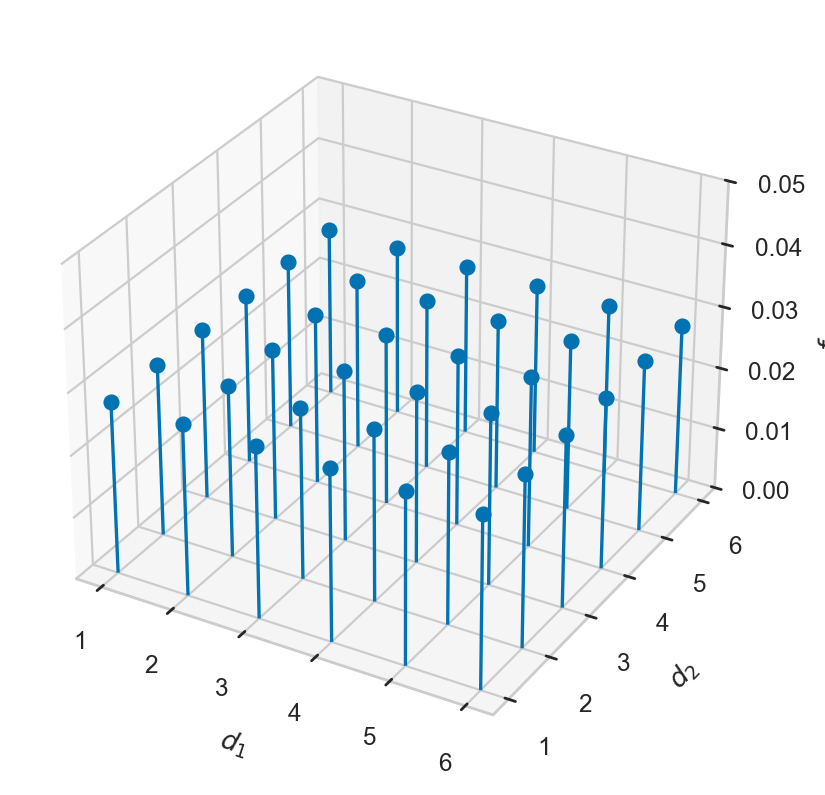

In [5]:
def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

def fD1D2(d1,d2):
    return fD(d1)*fD(d2)

xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fD1D2(x,y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05])

# save fig...
filename = os.path.join(DESTDIR, "example2__joint_pmf_of_two_die_rolls.pdf")
savefigure(ax, filename)

Saved figure to figures/prob/multiple/example2__joint_pmf_of_two_die_rolls_sum_7.pdf
Saved figure to figures/prob/multiple/example2__joint_pmf_of_two_die_rolls_sum_7.png


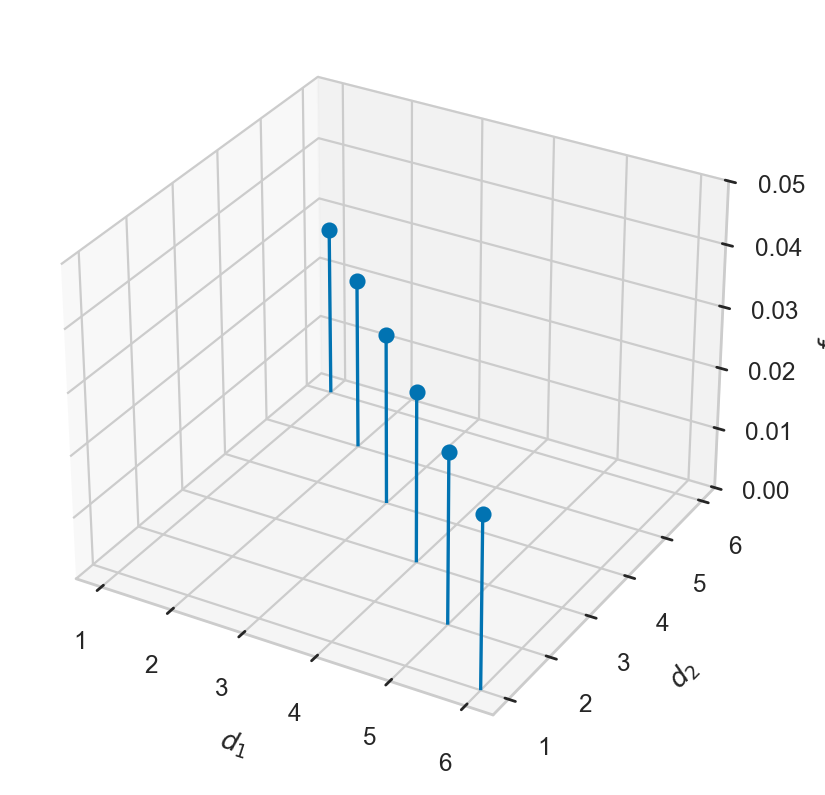

In [6]:
# PLOT D_1 + D_2 = 7
xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    y = 7 - x
    xs.append(x)
    ys.append(y)
    fXYxy = fD1D2(x,y)
    fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05])

# save fig...
filename = os.path.join(DESTDIR, "example2__joint_pmf_of_two_die_rolls_sum_7.pdf")
savefigure(ax, filename)

#### Example 3: coin-dependent dice roll

/Users/ivan/Projects/Minireference/software/ministats/ministats/utils.py:90: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


Saved figure to figures/prob/multiple/example3__joint_pmf_of_coin_depended_die_roll.pdf
Saved figure to figures/prob/multiple/example3__joint_pmf_of_coin_depended_die_roll.png


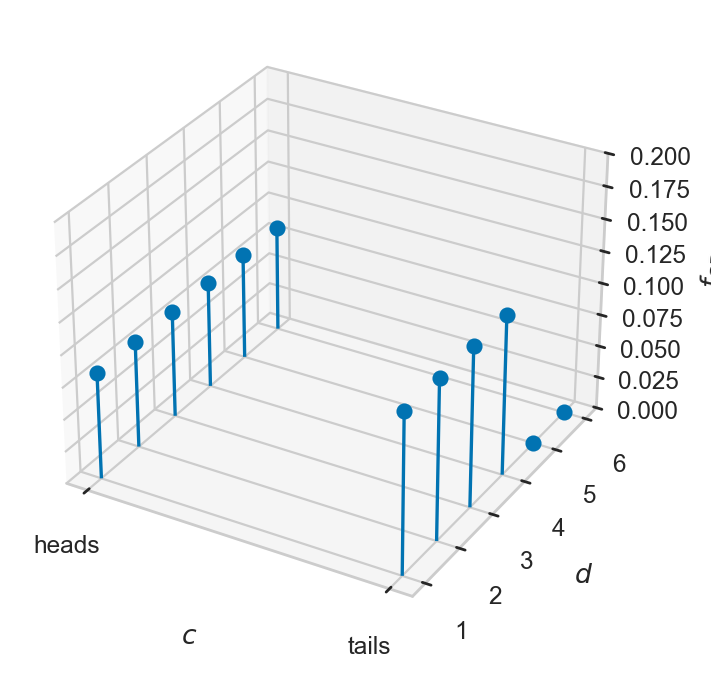

In [7]:
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

def fD4(d):
    if d in {1,2,3,4}:
        return 1/4
    else:
        return 0

def fCD(c,d):
    if c == "heads":
        return fC(c)*fD(d)
    elif c == "tails":
        return fC(c)*fD4(d)


xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fCD(map_int_to_label[x],y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_xlabel("$c$")
ax.set_ylabel("$d$")
ax.set_zlabel("$f_{CD}$")
ax.set_zlim([0, 0.2])

# save fig...
filename = os.path.join(DESTDIR, "example3__joint_pmf_of_coin_depended_die_roll.pdf")
savefigure(ax, filename)
# fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 4: diagnostic test

In [8]:
def fV(v):
    if v == 1:
        return 0.03
    elif v == 0:
        return 0.97

def fTgivenV1(t):
    if t == 1:
        return 0.90
    elif t == 0:
        return 0.10

def fTgivenV0(t):
    if t == 1:
        return 0.20
    elif t == 0:
        return 0.80

def fTgivenV(t,v):
    if v == 1:
        return fTgivenV1(t)
    elif v == 0:
        return fTgivenV0(t)

def fVT(v,t):
    return fV(v)*fTgivenV(t,v)

Saved figure to figures/prob/multiple/example4__joint_pmf_of_virus_diagnostic_test.pdf
Saved figure to figures/prob/multiple/example4__joint_pmf_of_virus_diagnostic_test.png


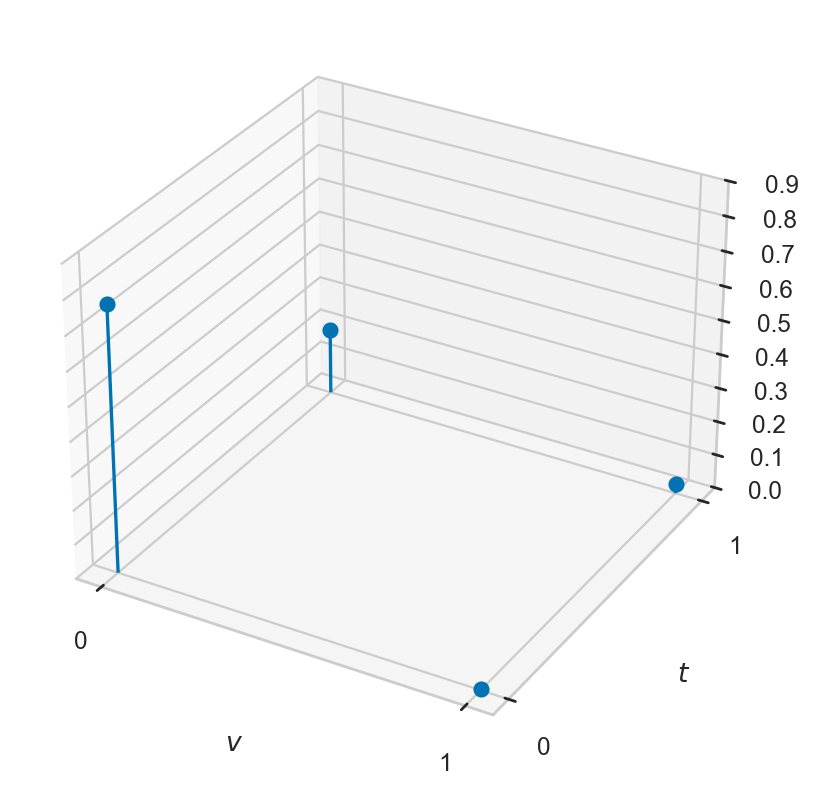

In [9]:
vs, ts, fVTs = [], [], []
for v in range(0,1+1):
    for t in range(0,1+1):
        vs.append(v)
        ts.append(t)
        fVTvt = fVT(v,t)
        fVTs.append(fVTvt)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(vs, ts, fVTs, basefmt=" ", bottom=0.0)
ax.set_xticks([0,1])
ax.set_xlabel("$v$")
ax.set_yticks([0,1])
ax.set_ylabel("$t$")
ax.set_zlabel("$f_{VT}$")
ax.set_zlim([0, 0.9])

# save fig...
filename = os.path.join(DESTDIR, "example4__joint_pmf_of_virus_diagnostic_test.pdf")
savefigure(ax, filename)